# Class Imbalance 클래스 불균형


- 전체 데이터 중에서 각 클래스별 값의 데이터가 매우 적거나 많은 경우 이러한 현상을 **클래스 불균형** 이라고 한다.
    - 즉, 데이터에서 각 클래스가 갖고 있는 데이터의 양에 차이가 큰 경우
- 이를 위해 **Under Sampling** 또는 **Over Sampling** 그리고 **Class Weight** 을 사용합니다.

1. Class Weight
    - Train 데이터에서 각 loss를 계산할 때 특정 클래스에 대해서는 더 큰 loss를 계산해주는 것
2. Under Sampling
    - 양이 많은 데이터를 양이 적은 데이터에 맞춰주는 방법
    - 이때, 양을 줄여준 데이터는 원본 데이터의 대표성을 잘 지니고 있어야 한다.
3. Over Sampling
    - 양이 적은 데이터를 양이 많은 데이터에 맞춰주는 방법
    - 이때, 양이 늘어난 데이터는 원본 데이터의 성질과 동일하다.

# 0.라이브러리 불러오기 및 데이터 준비

In [12]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [13]:
# 데이터 읽어오기
path = '../data/atrrition.csv'
data = pd.read_csv(path)
data.head()

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1


# 1. 데이터 파악하기

In [14]:
# 상위 몇 개 행 확인
data.head()

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1


In [15]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1150 non-null   int64 
 1   Age                       1150 non-null   int64 
 2   Department                1150 non-null   object
 3   DistanceFromHome          1150 non-null   int64 
 4   Education                 1150 non-null   int64 
 5   EducationField            1150 non-null   object
 6   Gender                    1150 non-null   object
 7   JobRole                   1150 non-null   object
 8   JobSatisfaction           1150 non-null   int64 
 9   MaritalStatus             1150 non-null   object
 10  MonthlyIncome             1150 non-null   int64 
 11  NumCompaniesWorked        1150 non-null   int64 
 12  RelationshipSatisfaction  1150 non-null   int64 
 13  TotalWorkingYears         1150 non-null   int64 
 14  TrainingTimesLastYear   

0    1050
1     100
Name: Attrition, dtype: int64


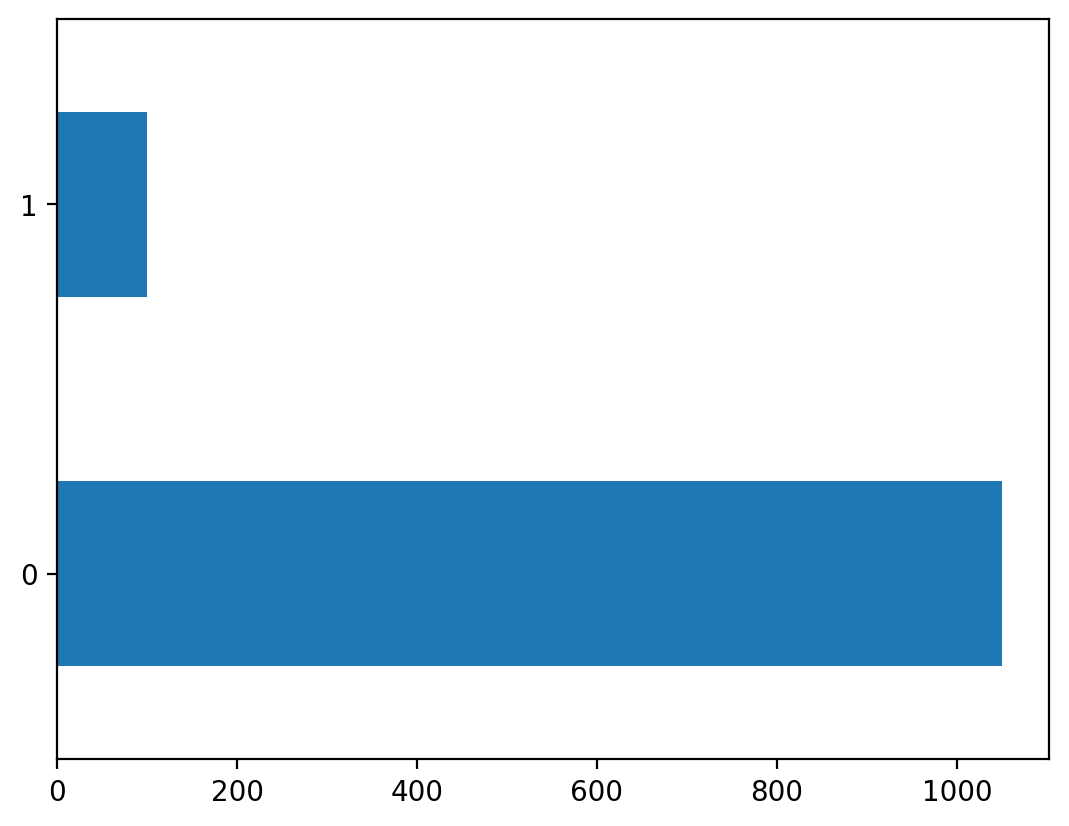

In [16]:
# Target 확인
print(data['Attrition'].value_counts())

# 시각화
data['Attrition'].value_counts().plot(kind='barh')
plt.show()

# 2. 데이터 전처리

**1) 가변수화**

In [17]:
# 가변수화
dumm_cols = ['Education', 'Department', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction',
             'MaritalStatus', 'RelationshipSatisfaction', 'WorkLifeBalance']
data = pd.get_dummies(data, columns=dumm_cols, drop_first=True)

**2) x, y 분리**

In [18]:
# target 확인
target = 'Attrition'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**3) 학습용, 평가용 데이터 분리**

In [19]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 3. 모델링

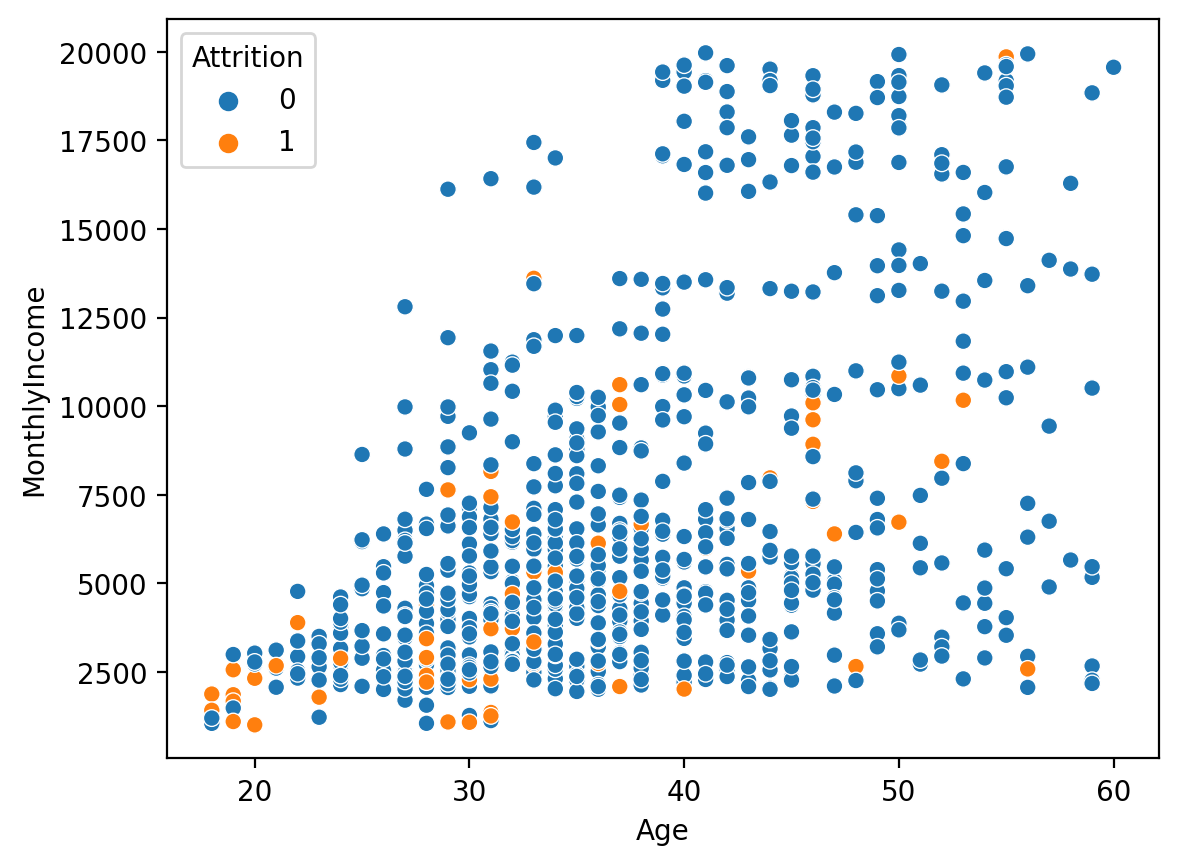

In [20]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=y_train, data=x_train)
plt.show()

In [11]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[317   1]
 [ 26   1]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       318
           1       0.50      0.04      0.07        27

    accuracy                           0.92       345
   macro avg       0.71      0.52      0.51       345
weighted avg       0.89      0.92      0.89       345



- Accuracy(정확도)는 높지만 Target 값 1에 대한 Recall(재현율, 민감도)이 매우 낮다.
- 전체 데이터 중에서 Target 값이 1인 데이터가 매우 적기 때문이다.
- 이러한 현상을 **클래스 불균형** 이라고 한다.
- 이를 위해 **Under Sampling** 또는 **Over Sampling** 을 사용합니다.

# 3.1 Under Sampling

**1) Under Sampling**

In [21]:
# imblearn 설치
!pip install imbalanced-learn

In [22]:
# 불러오기
from imblearn.under_sampling import RandomUnderSampler

# Under Sampling
under_sample = RandomUnderSampler()
u_x_train, u_y_train = under_sample.fit_resample(x_train, y_train)

# 확인
print('전:', np.bincount(y_train))
print('후:', np.bincount(u_y_train))

전: [732  73]
후: [73 73]


**2) 학습 데이터 분포 확인**

- 시각화해서 Resampling 된 학습 데이터 분포를 확인

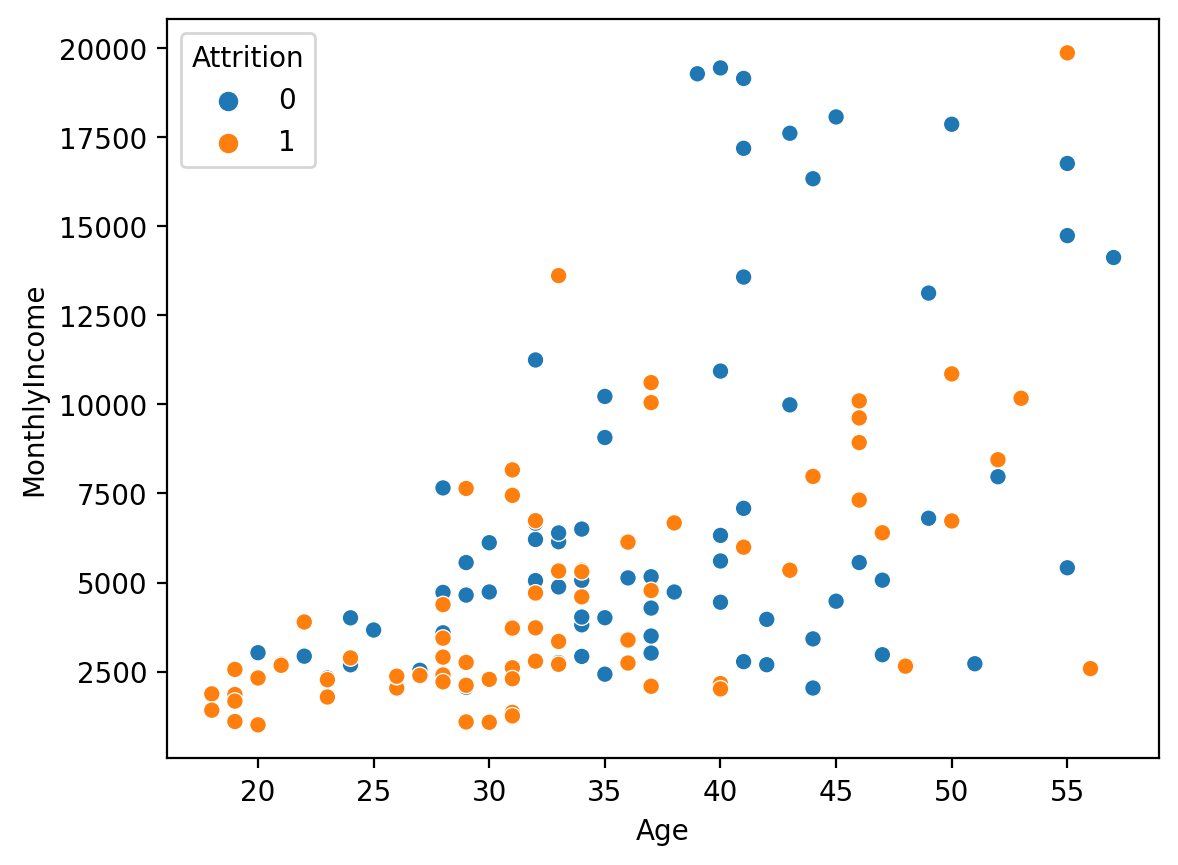

In [23]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=u_y_train, data=u_x_train)
plt.show()

**3) 모델 성능 확인**

In [24]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(u_x_train, u_y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[224  94]
 [ 13  14]]
              precision    recall  f1-score   support

           0       0.95      0.70      0.81       318
           1       0.13      0.52      0.21        27

    accuracy                           0.69       345
   macro avg       0.54      0.61      0.51       345
weighted avg       0.88      0.69      0.76       345



# 3.2 Over Sampling #1

**1) Over Sampling**

In [25]:
# 불러오기
from imblearn.over_sampling import RandomOverSampler

# Over Sampling
over_sample = RandomOverSampler()
o_x_train, o_y_train = over_sample.fit_resample(x_train, y_train)

# 확인
print('전:', np.bincount(y_train))
print('후:', np.bincount(o_y_train))

전: [732  73]
후: [732 732]


**2) 학습 데이터 분포 확인**

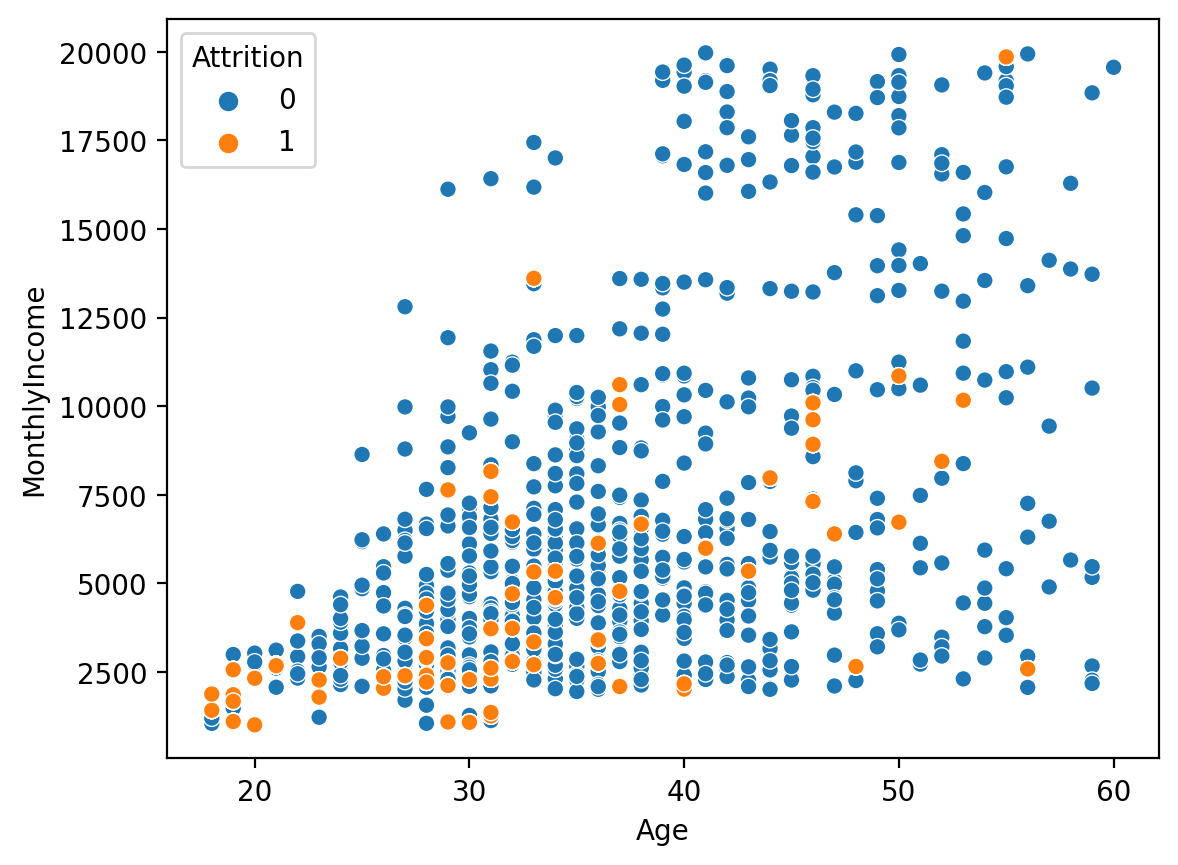

In [26]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=o_y_train, data=o_x_train)
plt.show()

**3) 모델 성능 확인**

In [27]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(o_x_train, o_y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[292  26]
 [ 16  11]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       318
           1       0.30      0.41      0.34        27

    accuracy                           0.88       345
   macro avg       0.62      0.66      0.64       345
weighted avg       0.90      0.88      0.89       345



# 3.2 Over Sampling #2

**1) Over Sampling**

In [28]:
# 불러오기
from imblearn.over_sampling import SMOTE

# Over Sampling
smote = SMOTE()
s_x_train, s_y_train = smote.fit_resample(x_train, y_train)

# 확인
print('전:', np.bincount(y_train))
print('후:', np.bincount(s_y_train))

전: [732  73]
후: [732 732]


**2) 학습 데이터 분포 확인**

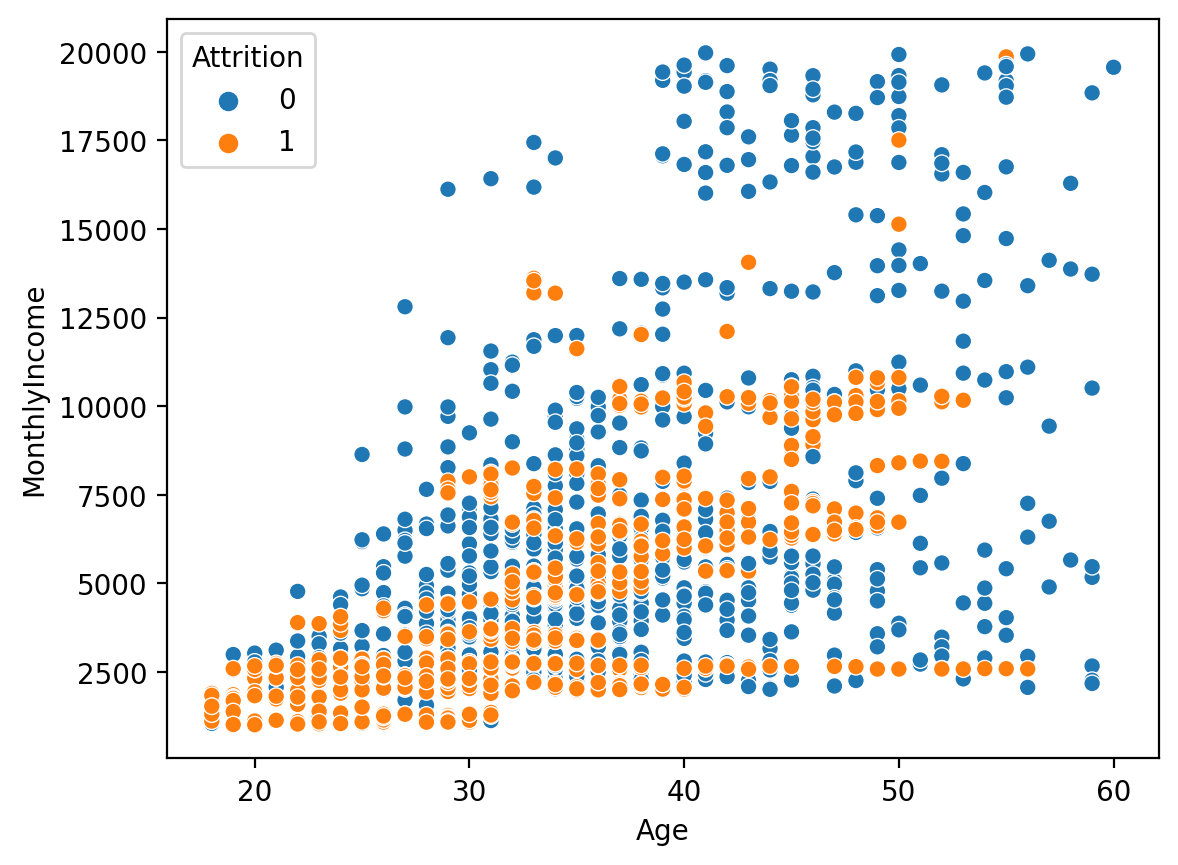

In [29]:
# 학습 데이터 분포 확인
sns.scatterplot(x='Age', y='MonthlyIncome', hue=s_y_train, data=s_x_train)
plt.show()

**3) 모델 성능 확인**

In [30]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

# 학습하기
model.fit(s_x_train, s_y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[304  14]
 [ 18   9]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       318
           1       0.39      0.33      0.36        27

    accuracy                           0.91       345
   macro avg       0.67      0.64      0.66       345
weighted avg       0.90      0.91      0.90       345



# 3.3.Class Weight

- class_weight 하이퍼파라미터를 설정해 모델링한 후 성능을 확인합니다.

In [31]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1, class_weight='balanced')

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[302  16]
 [ 17  10]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       318
           1       0.38      0.37      0.38        27

    accuracy                           0.90       345
   macro avg       0.67      0.66      0.66       345
weighted avg       0.90      0.90      0.90       345

